# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #219EBC; text-align: center; line-height: 1.25;"><b>Caravan Insurance Prediction</b><br><span style="color: #000000; font-size: 24px">With Various Classification Models</span></h1>
<hr>

# <div style = "font-family: Trebuchet MS; background-color: #023047; color: #ffffff; padding: 12px; line-height: 1.5;">1. | Introduction</div>
<center>
    <img src="https://beginanalyticsblog.files.wordpress.com/2017/03/insurance-11.jpg" alt="Insurance" width="80%">
</center>

## <div style="font-family: Trebuchet MS; background-color: #219EBC; color: #FFFFFF; padding: 12px; line-height: 1.5;">Dataset Problems</div>
<div style="font-family: Segoe UI; color: #000000; line-height: 1.5; text-align: justify; font-size: 15px;">
    ➤ The given dataset contains rows for <b>both</b> train and test dataset as indicated by the <b>ORIGIN</b> column <br>
    ➤ The dataset has a total of 86 columns <b>not</b> including ORIGIN column <br>
    ➤ A detailed decription of dataset can be found here: <a href="https://www.kaggle.com/datasets/uciml/caravan-insurance-challenge">https://www.kaggle.com/datasets/uciml/caravan-insurance-challenge</a> <br>
    ➤ We have to train machine learning models so we can predict whether a customer is eligible for insurance or not <br>
</div>

## <div style="font-family: Trebuchet MS; background-color: #219EBC; color: #FFFFFF; padding: 12px; line-height: 1.5;">Notebook Objectives</div>
<div style="font-family: Segoe UI; color: #000000; line-height: 1.5; text-align: justify;font-size: 15px;">
    ➤  <mark>Load the data</mark> and separate the training and testing dataset<br>
    ➤  <mark>Pre-process the data</mark> using multiple techniques suhc as field selection, normalization, etc<br>
    ➤  <mark>Train multiple machine learning classification models</mark> on the data and predict the output<br>
    ➤  <mark>Compare</mark> all the trained models using accuracy and confusion matrix function<br>
</div>

## <div style="font-family: Trebuchet MS; background-color: #219EBC; color: #FFFFFF; padding: 12px; line-height: 1.5;">Machine Learning Classification Models</div>
<div style="font-family: Segoe UI; color: #000000; line-height: 1.5; text-align: justify;font-size: 15px;">
    The models used in this notebook are:<br>
    <ol>
        <li> <b>Decision Tree</b> </li>
        <li> <b>Naive Bayes</b> </li>
        <li> <b>Random Forest</b> </li>
        <li> <b>SVM</b> </li>
        <li> <b>Logistic Regression</b> </li>
        <li> <b>Gradient Boosting</b> </li>
    </ol>
</div>

# <div style = "font-family: Trebuchet MS; background-color: #023047; color: #ffffff; padding: 12px; line-height: 1.5;">2. | Importing Libraries</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify;font-size: 15px;">
    ➤ <b>Importing libraries</b> that will be used in this notebook.
</div>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pandas.io.parsers import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE                   # For Oversampling

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
/kaggle/input/caravan-insurance-challenge/caravan-insurance-challenge.csv


# <div style = "font-family: Trebuchet MS; background-color: #023047; color: #ffffff; padding: 12px; line-height: 1.5;">3. | Reading Dataset</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify;font-size: 15px;">
    ➤ Load the data that has been given to us and display a sample of data.
</div>

In [2]:
dataset = pd.read_csv('')
display(dataset.sample(10))

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
2688,train,9,1,2,3,3,6,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1119,train,7,1,3,3,2,1,5,1,4,...,0,0,0,1,0,0,0,0,0,0
4020,train,31,1,3,2,7,2,2,0,5,...,0,0,0,1,0,0,0,0,0,0
4115,train,7,1,3,3,2,1,5,0,4,...,0,0,0,1,0,0,0,0,0,0
3470,train,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0
6885,test,9,1,2,3,3,1,4,1,4,...,0,0,0,0,0,0,0,0,0,0
5344,train,9,1,3,3,3,0,5,0,4,...,0,0,0,0,0,0,0,0,0,0
9414,test,9,1,4,3,3,1,3,1,5,...,0,0,0,1,0,0,0,0,0,0
1571,train,33,1,2,3,8,0,5,2,2,...,0,0,0,0,0,0,0,0,0,0
798,train,18,10,2,2,4,1,1,1,7,...,0,0,0,0,0,0,0,0,0,0


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify;font-size: 15px;">
    As we can see the training and testing datasets are mixed so we need to separate the two for training and evaluation purposes.
</div>

In [3]:
# Separating train and test datasets
train_dataset = dataset[dataset['ORIGIN'] == 'train']
test_dataset = dataset[dataset['ORIGIN'] == 'test']

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Training Dataset</div>

In [4]:
display(train_dataset.head())

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Testing Dataset</div>

In [5]:
display(test_dataset.head())

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
5822,test,33,1,4,2,8,0,6,0,3,...,0,0,0,1,0,0,0,0,0,0
5823,test,6,1,3,2,2,0,5,0,4,...,0,0,0,1,0,0,0,0,0,1
5824,test,39,1,3,3,9,1,4,2,3,...,0,0,0,1,0,0,0,0,0,0
5825,test,9,1,2,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
5826,test,31,1,2,4,7,0,2,0,7,...,0,0,0,1,0,0,0,0,0,0


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify;font-size: 15px;">
    Finally, drop the ORIGIN column from both datasets 
</div>

In [6]:
train_dataset.drop(['ORIGIN'],inplace=True,axis=1)
test_dataset.drop(['ORIGIN'],inplace=True,axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# <div style = "font-family: Trebuchet MS; background-color: #023047; color: #ffffff; padding: 12px; line-height: 1.5;">4. | Pre-processing</div>

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Finding correlation for feature selection</div>

In [7]:
corr = dataset.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1).set_properties(**{'max-width': '80px', 'font-size': '10pt'}).set_caption("Hover to magify").set_precision(2).set_table_styles(magnify())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify;font-size: 15px;">
    Dropping all the highly correlated fields here we keep threshold = <b>0.7</b>
</div>

In [8]:
dataset1 = train_dataset.drop(['MOSHOOFD','MFWEKIND','MRELOV','MGODPR','MRELOV','MOPLMIDD','MOPLHOOG','MAUT0','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND'],axis=1)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify;font-size: 15px;">
    Removing fields that has only a single class because they dont have much impact on output
</div>

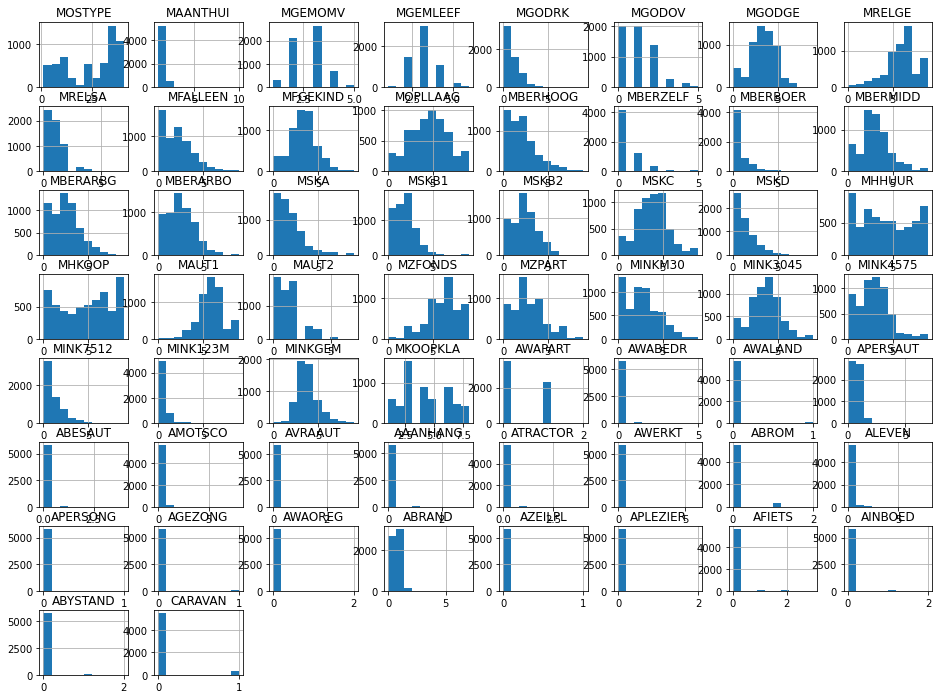

In [9]:
dataset1.hist(figsize=(16,12));

In [10]:
dataset2 = dataset1.drop(['ABESAUT', 'AGEZONG', 'AINBOED', 'APERSONG', 'APLEZIER', 'AVRAAUT', 'AWAOREG', 'AWERKT', 'AZEILPL'],axis=1)

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Final training dataset</div>

In [11]:
dataset2.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODOV,MGODGE,MRELGE,MRELSA,MFALLEEN,...,APERSAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM,ALEVEN,ABRAND,AFIETS,ABYSTAND,CARAVAN
0,33,1,3,2,0,1,3,7,0,1,...,1,0,0,0,0,0,1,0,0,0
1,37,1,2,2,1,1,4,6,2,0,...,0,0,0,0,0,0,1,0,0,0
2,37,1,2,2,0,2,4,3,2,4,...,1,0,0,0,0,0,1,0,0,0
3,9,1,3,3,2,2,4,5,2,2,...,1,0,0,0,0,0,1,0,0,0
4,40,1,4,2,1,1,4,7,1,2,...,0,0,0,0,0,0,1,0,0,0


### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Normalization - Using MinMax Scaler</div>

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(dataset2.drop(['CARAVAN'],axis=1).values)

y = np.vstack(dataset2['CARAVAN'].values)

print('\n')
print('X and y Input Data:', X.shape, y.shape)



X and y Input Data: (5822, 48) (5822, 1)


### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Applying SMOTE</div>

In [13]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X, y)
print('Training Set Shape after oversampling:', X_train.shape, y_train.shape)

Training Set Shape after oversampling: (10948, 48) (10948,)


### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">We have prepared the training dataset, now we do the same pre-processing steps on the testing dataset so we can check the model accuracy</div>

In [14]:
test_dataset.drop(['ABESAUT', 'AGEZONG', 'AINBOED', 'APERSONG', 'APLEZIER', 'AVRAAUT', 'AWAOREG', 'AWERKT', 'AZEILPL','MOSHOOFD','MFWEKIND','MRELOV','MGODPR','MRELOV','MOPLMIDD','MOPLHOOG','MAUT0','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
X_test = min_max_scaler.fit_transform(test_dataset.drop(['CARAVAN'],axis=1).values)
y_test = np.vstack(test_dataset['CARAVAN'].values)
print('Testing dataset shape:',X_test.shape,y_test.shape)

Testing dataset shape: (4000, 48) (4000, 1)


# <div style = "font-family: Trebuchet MS; background-color: #023047; color: #ffffff; padding: 12px; line-height: 1.5;">5. | Training Machine Learning Classification Models</div>

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Decision Tree</div>

In [16]:
clf_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_decrease=1e-07)
clf_DT.fit(X_train, y_train)
y_pred_DT = clf_DT.predict(X_test)

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Naive Bayes Classifier</div>

In [17]:
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Random Forest</div>

In [18]:
clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_decrease=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">SVM Classifier</div>

In [19]:
clf_SVM = SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=42)
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_test)

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Logistic Regression</div>

In [20]:
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_test)

[LibLinear]iter  1 act 1.136e+03 pre 1.051e+03 delta 7.360e+00 f 7.589e+03 |g| 9.368e+02 CG   6
iter  2 act 1.416e+02 pre 1.345e+02 delta 7.360e+00 f 6.452e+03 |g| 1.526e+02 CG  11
iter  3 act 4.356e+00 pre 4.296e+00 delta 7.360e+00 f 6.311e+03 |g| 2.764e+01 CG  12
iter  4 act 2.154e-01 pre 2.152e-01 delta 7.360e+00 f 6.306e+03 |g| 1.975e+00 CG  21
iter  5 act 1.717e-03 pre 1.718e-03 delta 7.360e+00 f 6.306e+03 |g| 1.921e-01 CG  20


### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Gradient Boosting Classifier</div>

In [21]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_test)

# <div style = "font-family: Trebuchet MS; background-color: #023047; color: #ffffff; padding: 12px; line-height: 1.5;">6. | Comparing Models</div>

### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Accuracy of models</div>

In [22]:
y_test = y_test.reshape(-1)

Names = ['Decision Tree','Naive Bayes','Random Forest','Support vector machine','Logistic Regression','Gradient Boost']
accurate = [accuracy_score(y_test, y_pred_DT)*100,accuracy_score(y_test, y_pred_NB)*100,accuracy_score(y_test, y_pred_RF)*100,
           accuracy_score(y_test, y_pred_SVM)*100,accuracy_score(y_test, y_pred_Log)*100,accuracy_score(y_test, y_pred_GB)*100]

df = pd.DataFrame(list(zip(Names,accurate)),columns=['Model','Accuracy'])
df.style.hide_index().highlight_max(color = 'lightblue', axis = 0,subset=['Accuracy'])

Model,Accuracy
Decision Tree,58.175000
Naive Bayes,70.800000
Random Forest,88.075000
Support vector machine,77.375000
Logistic Regression,76.575000
Gradient Boost,61.825000


### <div style="font-family: Trebuchet MS; background-color: #80CED7; color: #FFFFFF; padding: 12px; line-height: 1.5;">Corresponding Confusion Matrices</div>

Text(0.5, 1.0, 'Gradient Boosting Classifier')

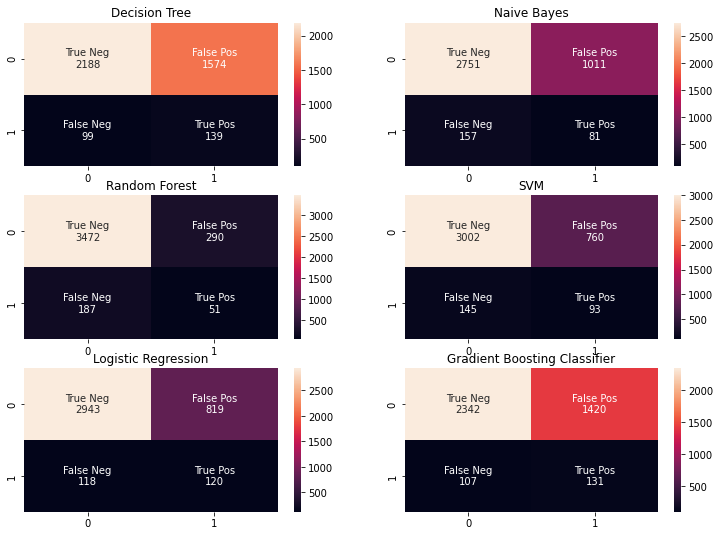

In [23]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

a4_dims = (12.5, 9)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=a4_dims)

# Decision Tree
cm_DT = confusion_matrix(y_test,y_pred_DT)
group_counts = ["{0:0.0f}".format(value) for value in cm_DT.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_DT,annot=labels,fmt='',ax=ax1)
ax1.set_title('Decision Tree')

# Naive Bayes
cm_NB = confusion_matrix(y_test,y_pred_NB)
group_counts = ["{0:0.0f}".format(value) for value in cm_NB.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_NB,annot=labels,fmt='',ax=ax2)
ax2.set_title('Naive Bayes')

# Random Forest
cm_RF = confusion_matrix(y_test,y_pred_RF)
group_counts = ["{0:0.0f}".format(value) for value in cm_RF.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_RF,annot=labels,fmt='',ax=ax3)
ax3.set_title('Random Forest')

# SVM
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
group_counts = ["{0:0.0f}".format(value) for value in cm_SVM.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_SVM,annot=labels,fmt='',ax=ax4)
ax4.set_title('SVM')

# Logistic Regression
cm_Log = confusion_matrix(y_test,y_pred_Log)
group_counts = ["{0:0.0f}".format(value) for value in cm_Log.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_Log,annot=labels,fmt='',ax=ax5)
ax5.set_title('Logistic Regression')

# Gradient Boosting Classifier
cm_GB = confusion_matrix(y_test,y_pred_GB)
group_counts = ["{0:0.0f}".format(value) for value in cm_GB.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_GB,annot=labels,fmt='',ax=ax6)
ax6.set_title('Gradient Boosting Classifier')

# <div style = "font-family: Trebuchet MS; background-color: #023047; color: #ffffff; padding: 12px; line-height: 1.5;">7. | Output</div>
<div style="font-family: Segoe UI; color: #000000; line-height: 1.5; text-align: justify;font-size: 16px;">
  So, we find out that for this dataset <b>Random Forest Classifier</b> is the most accurate model with 88.45%   
</div>